# Demo Test

In [1]:
from MoviePredicter import MoviePredicter
import pandas as pd
import numpy as np

c:\Users\emend\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
def predict(data, quantity=1000, ignored_value=None):
    # Selects a random row and a random column from the data matrix
    indexes = []
    real_score = []

    if ignored_value is not None:
        while len(indexes) < quantity:
            i = np.random.randint(0, data.shape[0])
            j = np.random.randint(0, data.shape[1])

            if data[i][j] != ignored_value:
                indexes.append((i, j))
                real_score.append(data[i][j])
                # Inserts noise into the data matrix
                data[i][j] = np.random.randint(0, 5)
         
    else:
        indexes = [(np.random.randint(0, 5), np.random.randint(0, 5)) for _ in range(quantity)]
        for i, j in indexes:
            real_score.append(data[i][j])
            data[i][j] = np.random.randint(0, 5)
    
    mp = MoviePredicter(data)

    predicted_score = mp.predict(indexes)
    real_score = np.array(real_score)

    return real_score - predicted_score

In [6]:
df = pd.read_csv('ratings_small.csv')

data = pd.pivot_table(df, values='rating', index='userId', columns='movieId', fill_value=np.mean(df['rating']))

data = data.to_numpy()

In [63]:
errors = predict(data, 1000, np.mean(df['rating']))

Real scores: [4.  5.  5.  1.  2.  3.  4.  5.  3.  5.  3.5 3.  4.  3.5 4.5 3.5 4.5 3.
 5.  4.  4.  4.5 3.5 4.5 3.  5.  5.  3.5 1.  1.  5.  1.  4.  5.  3.  1.
 5.  3.  3.  3.  3.  4.  4.  4.  4.  4.  4.  4.  3.  3.  5.  3.  5.  5.
 3.  4.5 4.5 0.5 4.  3.  4.  3.  4.  3.  3.5 3.5 3.  1.  4.5 4.  4.5 2.5
 4.  4.  5.  3.  3.  0.5 4.  3.  3.  1.5 3.  4.  4.  3.  4.  4.5 4.  2.5
 3.  2.  4.  5.  4.  3.  1.5 3.  4.  1.5 3.  4.  4.  1.  4.  4.5 1.5 1.
 3.  1.  4.  5.  5.  4.  3.  4.  4.5 3.  4.  3.  4.  5.  5.  1.  3.5 3.
 3.  4.  2.  3.  3.  3.  4.  4.  5.  5.  4.  3.  4.  4.  4.  3.  5.  4.
 5.  4.  3.5 4.5 4.5 5.  4.  3.  2.  3.5 4.  3.  3.5 4.  5.  4.5 4.  3.
 4.  3.  4.  4.  1.  4.5 4.  4.  4.  4.  4.  4.  3.  3.  3.5 3.5 2.5 3.5
 4.  4.  3.  2.  4.5 1.5 5.  4.  5.  3.5 4.  5.  0.5 3.  2.  4.  4.  3.
 5.  5.  4.  2.  3.  3.  4.  2.5 4.  5.  3.  3.  4.  4.  5.  3.  3.  3.5
 3.  4.  4.  3.  5.  3.  3.5 5.  2.5 4.  3.  3.  4.  3.  4.  4.  4.  3.5
 3.  3.  3.5 4.  4.  4.5 4.  3.  4.  3.  4.  3

In [64]:
print(errors)

[ 7.38096399e-01  1.50481388e+00  1.45061909e+00 -8.08266202e-01
  3.10990583e-01 -5.34751824e-01  4.96860324e-01  1.42912749e+00
 -1.23285680e+00  8.76240481e-01 -4.50861486e-01 -4.10755744e-01
  2.09232724e+00  1.13526444e-01  9.61162073e-01  5.59601603e-02
  8.08494425e-01 -5.65432202e-01  1.24051984e+00  2.83034727e-01
  2.98798510e-02  4.34400361e+00 -7.92972986e-02  8.60243245e-01
 -3.85146893e-01  9.92625449e-01  1.45798742e+00 -2.69016708e-02
 -2.30290012e+00 -1.92469702e+00  1.46044513e+00 -2.38308725e+00
  5.72871256e-01  1.27725217e+00 -5.19454593e-01 -3.07008151e+00
  1.35085891e+00 -4.96387061e-01  1.86208700e+00 -4.96566512e-01
 -4.52583878e-01  2.59696449e-01  6.43981582e-01  4.28472019e-01
  9.76476785e-01  5.61103672e-01  2.40378928e-01 -7.77691694e-03
  1.96916391e+00  1.49650786e+00  1.24322762e+00 -4.18778810e-01
  1.41112123e+00  2.45009803e+00 -5.54439124e-01  2.43653623e+00
  1.00901360e+00 -3.01824886e+00  4.03564513e-01  8.02287660e-01
  3.41331437e-01 -2.72520

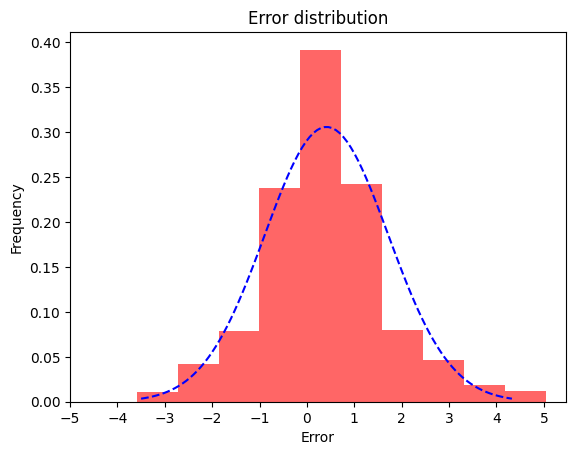

In [75]:
import matplotlib.pyplot as plt


plt.figure()

# Código da curva normal gerado com auxilio do ChatGPT
mu, sigma = np.mean(errors), np.std(errors)

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-(x - mu)**2/(2*sigma**2))

plt.plot(x, y, 'b--')


plt.hist(errors, bins=10, density=True, alpha=0.6, color='r')
plt.xticks(np.arange (-5, 5.1, 1))
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Error distribution')
plt.show()

In [70]:
# Calculates the mean absolute error
mae = np.mean(np.abs(errors))

print(f'Mean absolute error: {mae}')

# Calculates the mean error
me = np.mean(errors)

print(f'Mean error: {me}')

# Calculates the standard deviation of the errors
std = np.std(errors)

print(f'Standard deviation of the errors: {std}')

Mean absolute error: 1.0315391594587018
Mean error: 0.4125569026888741
Standard deviation of the errors: 1.304301590201064


# **Teste de Estresse**

O erro absoluto máximo aceitável é de 2.5. O código roda testes, inserindo cada vez mais ruído nos *ratings*, até superar essa marca.

In [10]:
df_ = pd.DataFrame(columns=["Noise", "Mean absolute error"])

n = 5000
mae = 0
while mae < 2.5 and n < 100000:
    df = pd.read_csv('ratings_small.csv')

    data = pd.pivot_table(df, values='rating', index='userId', columns='movieId', fill_value=np.mean(df['rating']))

    data = data.to_numpy()

    errors = predict(data, n, np.mean(df['rating']))
    mae = np.mean(np.abs(errors))

    append = pd.DataFrame({"Noise":[n], "Mean absolute error": [mae]})
    df_.loc[len(df_)] = append.iloc[0]

    n += 5000
    print(f'mae {mae}')
    print(f'me {np.mean(errors)}')

mae 1.0233903360671912
me 0.3760566878123505
mae 1.0724739165655897
me 0.3864180918813359
mae 1.091398777502988
me 0.3400952074381176
mae 1.13713877248927
me 0.34134810893343304
mae 1.1403447123872905
me 0.3127768680811012
mae 1.1607567713874063
me 0.2904404085765317
mae 1.1823911797782183
me 0.2630460698935391
mae 1.1961729101368235
me 0.2531265256874975
mae 1.2079625471817728
me 0.23676447136708384
mae 1.2197888012566156
me 0.20990549752474283
mae 1.2334876896492268
me 0.19788998542577976
mae 1.2428637074990747
me 0.18160943939560872
mae 1.2469669732779247
me 0.14766742409979525
mae 1.2604756009600808
me 0.14452132958087524
mae 1.2648687640074647
me 0.11202920920975334
mae 1.2798527367697454
me 0.10579154535042089
mae 1.2849918582230528
me 0.09077277974893325
mae 1.2965357529037846
me 0.06052812698458093
mae 1.3004014775360688
me 0.04519045944835178


In [15]:
df_.head(19)

,Noise,Mean absolute error
0,5000.0,1.023390
1,10000.0,1.072474
2,15000.0,1.091399
3,20000.0,1.137139
4,25000.0,1.140345
5,30000.0,1.160757
6,35000.0,1.182391
7,40000.0,1.196173
8,45000.0,1.207963
9,50000.0,1.219789
